# **Movie: Recommendation system**

![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2019/07/data-science-movie-recommendation-project.jpg)

![](https://datascienceplus.com/wp-content/uploads/2017/09/2017-09-20-2.png)

**DATA**

Dataset acquired from [GroupLens](http://grouplens.org/datasets/movielens/). 

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

In [ ]:
df = pd.read_csv('/content/movies.csv')
df_content = pd.read_csv('/content/ratings.csv')
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
34203,151697,Grand Slam (1967),Thriller
34204,151701,Bloodmoney (2010),(no genres listed)
34205,151703,The Butterfly Circus (2009),Drama
34206,151709,Zero (2015),Drama|Sci-Fi


In [ ]:
df_content

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496
...,...,...,...,...
22884372,247753,49530,5.0,1430437962
22884373,247753,69481,3.0,1430437984
22884374,247753,74458,4.0,1430437968
22884375,247753,76093,5.0,1430437811


**Preprocessing**

In [ ]:
df_content['userId'].value_counts().describe()

count    247753.000000
mean         92.367709
std         193.271993
min           1.000000
25%          15.000000
50%          29.000000
75%          89.000000
max        9281.000000
Name: userId, dtype: float64

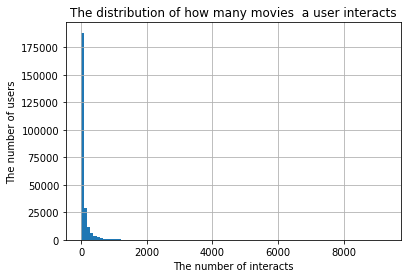

In [ ]:
df_content['userId'].value_counts().hist(bins=100)
plt.title('The distribution of how many movies  a user interacts')
plt.xlabel('The number of interacts')
plt.ylabel('The number of users')
plt.show()

In [ ]:
df['year'] = df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
df['year'] = df.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
df['title'] = df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
df['title'] = df['title'].apply(lambda x: x.strip())
df['genres'] = df.genres.str.split('|')

In [ ]:
moviesWithGenres_df = df.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_content = df_content[~df_content['movieId'].duplicated()]

In [ ]:
df['movieId'].value_counts().describe()

count    34208.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: movieId, dtype: float64

In [ ]:
len(df_content['movieId'])

33670

In [ ]:
def top_movie(n, df=df):
   
    top_movies = list(set(df[df['movieId'].isin(top_movie_Id(n))]['title']))
        
    return top_movies 

def top_movie_Id(n, df=df):
    
    movie_id_list = [str(aid) for aid in df['movieId'].value_counts().head(n).index]
 
    return movie_id_list 

In [ ]:
print(top_movie_Id(5))

['2047', '140846', '122385', '138424', '65045']


In [ ]:
print(top_movie(5))


['Alien Raiders', 'Thunder Birds', 'Gnome-Mobile, The', 'The Future', 'Toute première fois']


In [ ]:
df.head(2)

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995


In [ ]:
def maper_year():
    dict_y = dict()
    i = 1
    years_encoded = []
    
    for j in df['year']:
        if j not in dict_y:
            dict_y[j] = i
            i+=1
        
        years_encoded.append(dict_y[j])
    return years_encoded

years_encoded = maper_year()
del df['year']
df['user_id'] = years_encoded
df.head()

,movieId,title,genres,user_id
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1
1,2,Jumanji,"[Adventure, Children, Fantasy]",1
2,3,Grumpier Old Men,"[Comedy, Romance]",1
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1
4,5,Father of the Bride Part II,[Comedy],1


In [ ]:
no_of_rated_movies_per_user = df_content.groupby(by = "userId")["rating"].count().sort_values(ascending = False)

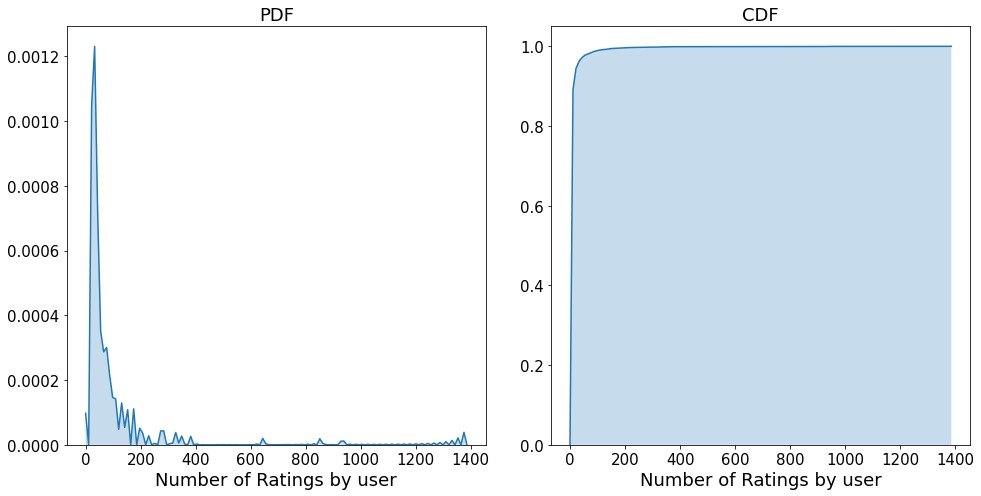

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(14,7))

sns.kdeplot(no_of_rated_movies_per_user.values, shade = True, ax = axes[0])
axes[0].set_title("PDF", fontsize = 18)
axes[0].set_xlabel("Number of Ratings by user", fontsize = 18)
axes[0].tick_params(labelsize = 15)

sns.kdeplot(no_of_rated_movies_per_user.values, shade = True, cumulative = True, ax = axes[1])
axes[1].set_title("CDF", fontsize = 18)
axes[1].set_xlabel("Number of Ratings by user", fontsize = 18)
axes[1].tick_params(labelsize = 15)

fig.subplots_adjust(wspace=2)
plt.tight_layout()
plt.show()

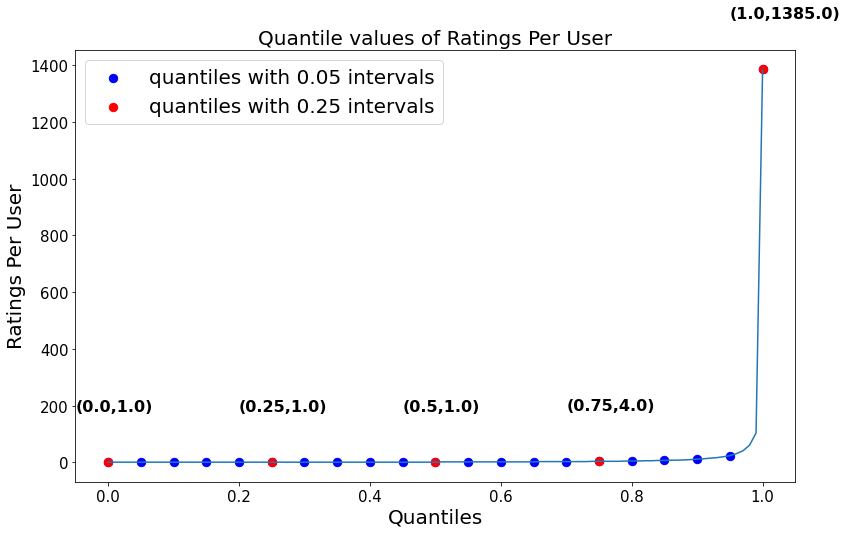

In [ ]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01))
fig = plt.figure(figsize = (10, 6))

axes = fig.add_axes([0.1,0.1,1,1])
axes.set_title("Quantile values of Ratings Per User", fontsize = 20)
axes.set_xlabel("Quantiles", fontsize = 20)
axes.set_ylabel("Ratings Per User", fontsize = 20)
axes.plot(quantiles)

plt.scatter(x = quantiles.index[::5], y = quantiles.values[::5], c = "blue", s = 70, label="quantiles with 0.05 intervals")
plt.scatter(x = quantiles.index[::25], y = quantiles.values[::25], c = "red", s = 70, label="quantiles with 0.25 intervals")
plt.legend(loc='upper left', fontsize = 20)

for x, y in zip(quantiles.index[::25], quantiles.values[::25]):
    plt.annotate(s = '({},{})'.format(x, y), xy = (x, y), fontweight='bold', fontsize = 16, xytext=(x-0.05, y+180))
    
axes.tick_params(labelsize = 15)

**Based Collaborative Filtering**

In [ ]:
def matrix_user_item(df):

#Return a matrix with user ids as rows and movie ids on the columns with 1 values where a user interacted with  an movie and a 0 otherwise

    user_item = df.groupby(['user_id', 'movieId'])['title'].count().notnull().unstack()
    user_item = user_item.notnull().astype(np.int)
    
    return user_item  

user_item = matrix_user_item(df)

In [ ]:
user_item.head(2)

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,151593,151599,151601,151605,151611,151613,151615,151619,151621,151623,151625,151627,151629,151631,151641,151645,151647,151649,151655,151657,151661,151663,151667,151669,151671,151673,151675,151677,151679,151683,151685,151687,151689,151691,151695,151697,151701,151703,151709,151711
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def find_similar_users(user_id, user_item=user_item):
    similarity = dict()
    
    # compute similarity of each user to the provided user
    n_users = user_item.shape[0]
    for uid in range(1, n_users):
        similarity[uid] = np.dot(user_item.loc[user_id], user_item.loc[uid])

    # sort by similarity
    similarity = sorted(similarity.items(), key=lambda x: x[1], reverse=True)

    # create list of just the ids
    most_similar_users = [pair[0] for pair in similarity]
   
    # remove the own user's id
    most_similar_users = [uid for uid in most_similar_users if uid != user_id]
       
    return most_similar_users # return a list of the users in order from most to least similar
def get_movie_names(movie_ids, df=df):
    
    movie_names = list(set(df[df['movieId'].isin(movie_ids)]['title']))
    
    return movie_names # Return the movie names associated with list of movie ids


def get_user_movies(user_id, user_item=user_item):
    
    movie_ids = user_item.loc[user_id]
    movie_ids =  [str(aid) for aid in movie_ids[movie_ids == 1].index]
    
    movie_names = get_movie_names(movie_ids)
    
    return movie_ids, movie_names 


def user_user_recs(user_id, m=10):
    
    user_ids = find_similar_users(user_id)
    
    recs = df[df['user_id'].isin(user_ids)]['movieId']
    
    recs = list(set(recs))
    
    return recs[:m] # return the recommendations for this user_id
def get_top_sorted_users(user_id, df=df, user_item=user_item):

    user_interactions = df.groupby(['user_id'])['movieId'].count()

    # compute similarity of each user to the provided user
    n_users = user_item.shape[0]
    
    # columns
    neighbor_id = [uid for uid in range(1, n_users) if uid != user_id]
    similarity = []
    num_interactions = []
    
    # set similarity and num_interactions
    for uid in neighbor_id:
        similarity.append(np.dot(user_item.loc[user_id], user_item.loc[uid]))
        num_interactions.append(user_interactions.loc[uid])
        
    # create dataframe
    neighbors_df = pd.DataFrame({
        'neighbor_id': neighbor_id,
        'similarity': similarity,
        'num_interactions': num_interactions
    })
    
    # sort dataframe by similarity
    neighbors_df.sort_values('similarity', ascending=False, inplace=True)
    
    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
   
    neighbors_df = get_top_sorted_users(user_id)
    
    # set top-m neighbor_id
    top_m_neighbors = list(neighbors_df[:m]['neighbor_id'])

    recs = []
    for uid in top_m_neighbors:
        movie_ids = user_item.loc[uid]
        recs.extend([str(aid) for aid in movie_ids[movie_ids == 1].index])

    # remove duplicate
    recs = list(set(recs[:m]))

    # set movie names and remove duplicate
    rec_names = list(set(df[df['movieId'].isin(recs)]['title']))

    return recs, rec_names

In [ ]:
rec_ids, rec_names = user_user_recs_part2(50, 10)
print("The top 10 recommendations for user 50 are the following movie ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 50 are the following movie names:")
print(rec_names)

The top 10 recommendations for user 50 are the following movie ids:
['10', '8', '9', '4', '3', '6', '2', '5', '7', '1']

The top 10 recommendations for user 50 are the following movie names:
['GoldenEye', 'Heat', 'Waiting to Exhale', 'Tom and Huck', 'Father of the Bride Part II', 'Sabrina', 'Sudden Death', 'Jumanji', 'Toy Story', 'Grumpier Old Men']


In [ ]:
get_top_sorted_users(120).iloc[0]

neighbor_id           1
similarity            0
num_interactions    523
Name: 0, dtype: int64

**Content Based Recommendations**

In [ ]:
def tokenize(x):
    
    stop_words = (set(stopwords.words('Zero')) | set(nltk.corpus.abc.words()))
    tokens = word_tokenize(x) #split each message into individual words
    lemmatizer = WordNetLemmatizer()
    clean_tokens=[]
    for token in tokens:
        #clean each token from whitespace and punctuation, and conver to
        #root of word ie walking->walk
        clean_token = lemmatizer.lemmatize(token).lower().strip()
        clean_tokens.append(clean_token)
        
    filtered = [word for word in clean_tokens if word not in stop_words and word.isalpha()]
    return filtered
def make_content_recs(data_id, user_id=True, m=10, df=df):
# OUTPUT:recs (list) - list of movie ids that are recommended | rec_names (list) - list of movie names that are recommended
        
   
    if(user_id):
        user_id = data_id
        try:
            #read movies
            movie_ids, _ = get_user_movies(user_id)
        except KeyError: #user does not exist
            print('User Doesnt Exist, Recommending Top movies')
            recs = top_movie_Id(m)
            return recs, get_movie_names(recs)
    
    else:
        movie_ids = data_id
        
    title_data = df.drop_duplicates(subset='movie_id') #drop duplicates 
    titles = title_data[title_data.movie_id.isin(list(map(float, movie_ids)))].title
    
    #tokenize the words in each movie title
    title_words=[]
    tokenized = tokenize(titles.str.cat(sep=' '))
    title_words.extend(tokenized)
    
    #find the highest occuring words
    common_words = pd.value_counts(title_words).sort_values(ascending=False)[:10].index

    top_matches={}
    #count number of occurences of each common word in other movie titles (this measures similarity)
    for word in common_words:
        word_count = pd.Series(title_data.title.str.count(word).fillna(0)) #gets occurences of each word in title
        top_matches[word] = word_count
                    
    top_matches = pd.DataFrame(top_matches) # num_cols== num of most common words
    top_matches['top_matches'] = top_matches.sum(axis=1)
    top_matches['movie_id'] = title_data.movie_id.astype(float)
    
    #get most interacted with movies
    movie_occurences = pd.DataFrame({'occurences':df.movie_id.value_counts()})

    #sort matches by most popular movies
    top_matches = top_matches.merge(movie_occurences, left_on='movie_id', right_index=True)
    top_matches.sort_values(['top_matches', 'occurences'], ascending=False, inplace=True)    
    
    #drop already read movies
    recs_df = top_matches[~top_matches.movie_id.isin(list(map(float, movie_ids)))]
    
    #get rec id and names
    recs = recs_df.movie_id[:m].values.astype(str)
    rec_names = get_movie_names(recs)
    
    return recs, rec_names

In [ ]:
make_content_recs('0.0', user_id=True)

User Doesnt Exist, Recommending Top movies


(['2047',
  '140846',
  '122385',
  '138424',
  '65045',
  '34330',
  '144994',
  '106268',
  '89806',
  '95780'],
 ['Alien Raiders',
  'Toute première fois',
  'Gnome-Mobile, The',
  'The Future',
  "Beautiful Dreamer: Brian Wilson and the Story of 'Smile'",
  'The Secret Life of Plants',
  'Proud and the Beautiful, The (Orgueilleux, Les) (Proud Ones, The)',
  'November',
  'Thunder Birds',
  'Dragon Ball Z: Bio-Broly (Doragon bôru Z 11: Sûpâ senshi gekiha! Katsu no wa ore da)'])

**Matrix Factorization**

In [ ]:
df_train = df.head(21845)
df_test = df.tail(12363)

def create_test_and_train_user_item(df_train, df_test):
#return:
#user_item_train : a user-item matrix of the training dataframe (unique users for each row and unique movies for each column)
#user_item_test - a user-item matrix of the testing dataframe (unique users for each row and unique movies for each column)
#test_idx - all of the test user ids
#test_arts - all of the test movie  ids
    
    user_item_train = matrix_user_item(df_train)
    user_item_test = matrix_user_item(df_test)
    
    test_idx = user_item_test.index.values
    test_arts = user_item_test.columns.values
    
    return user_item_train, user_item_test, test_idx, test_arts



In [ ]:
user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [ ]:
print('movies of the test set we can make predictions about')
print(len(np.intersect1d(df_train.movieId.unique(),df_test.movieId.unique())))

print('movies of the test set we cant make predictions about')
print(len(df_test.movieId.unique()) - len(np.intersect1d(df_train.movieId.unique(),df_test.movieId.unique())))

print('users of the test set we can make predictions about')
print(len(np.intersect1d(df_train.user_id.unique(),df_test.user_id.unique())))

print('users of the test set we cant make predictions about')
print(len(df_test.user_id.unique()) - len(np.intersect1d(df_train.user_id.unique(),df_test.user_id.unique())))

movies of the test set we can make predictions about
0
movies of the test set we cant make predictions about
12363
users of the test set we can make predictions about
108
users of the test set we cant make predictions about
17


>MODEL TRAINING

In [ ]:
# FIND TRAIN movies AND USER IDs
train_idx = np.array(user_item_train.index)
train_arts = np.array(user_item_train.columns)

# FIND USERS AND movies OF THE TEST SET CONTAINED ALSO IN THE TRAINING SET
test_user_subset = np.intersect1d(test_idx,train_idx)
test_movies_subset = np.intersect1d(test_arts,train_arts)

# FIND THE POSITION (ROW,COL) IN THE TRAINING MATRIX OF THE TEST SUBSET (USER ID, movies ID)
train_indexes = np.where(np.in1d(train_idx, test_user_subset))[0]
train_movies = np.where(np.in1d(train_arts, test_movies_subset))[0]

# FIND THE POSITION (ROW) IN THE TEST MATRIX OF THE TEST SUBSET (USER ID)
test_indexes = np.where(np.in1d(test_idx, test_user_subset))[0]

In [ ]:
#u_train, s_train, vt_train = np.linalg.svd(user_item_train)

> MODEL TESTING

In [ ]:
num_latent_feats = np.arange(10,570,10)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_train_k, u_train_k, vt_train_k = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    
    s_test_k, u_test_k, vt_test_k = s_train_k, u_train_k[train_indexes,:], vt_train_k[:,train_movies]
    
    # take dot product
    user_item_test_subset_est = np.around(np.dot(np.dot(u_test_k, s_test_k), vt_test_k))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_test_subset, user_item_test_subset_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)


n_interactions_subset = user_item_test_subset.shape[0]*user_item_test_subset.shape[1]
    
